# Decision Trees for Regression on Boston Housing Dataset

This data was originally a part of UCI Machine Learning Repository. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s



I**mport the required Libraries**

In [14]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.model_selection import train_test_split

%matplotlib inline

**Load the Boston Housing DataSet from scikit-learn into a pandas dataframe**

In [15]:
boston = pd.read_csv('HousingData.csv')
null_values=['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']
boston[null_values]=boston[null_values].fillna(0.0)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,0.00,36.2


**Prepare the data for training**

We use both variables **LSTAT** and **RM**, to show how to use decision trees for regression

In [16]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']

In [17]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [18]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

tree = DecisionTreeRegressor(criterion='squared_error', max_depth=3)         
tree.fit(X_train, y_train)
  
#TEST
y_test_predict = tree.predict(X_test)

In [19]:
# model evaluation for testing set

print('Mean Absolute Error:', mean_absolute_error(y_test, y_test_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_test_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_predict)))

print('R2 score:', r2_score(y_test, y_test_predict))

Mean Absolute Error: 2.9989768207833873
Mean Squared Error: 16.270014177059295
Root Mean Squared Error: 4.033610563386021
R2 score: 0.7921929974044509


Visualization of the decision tree

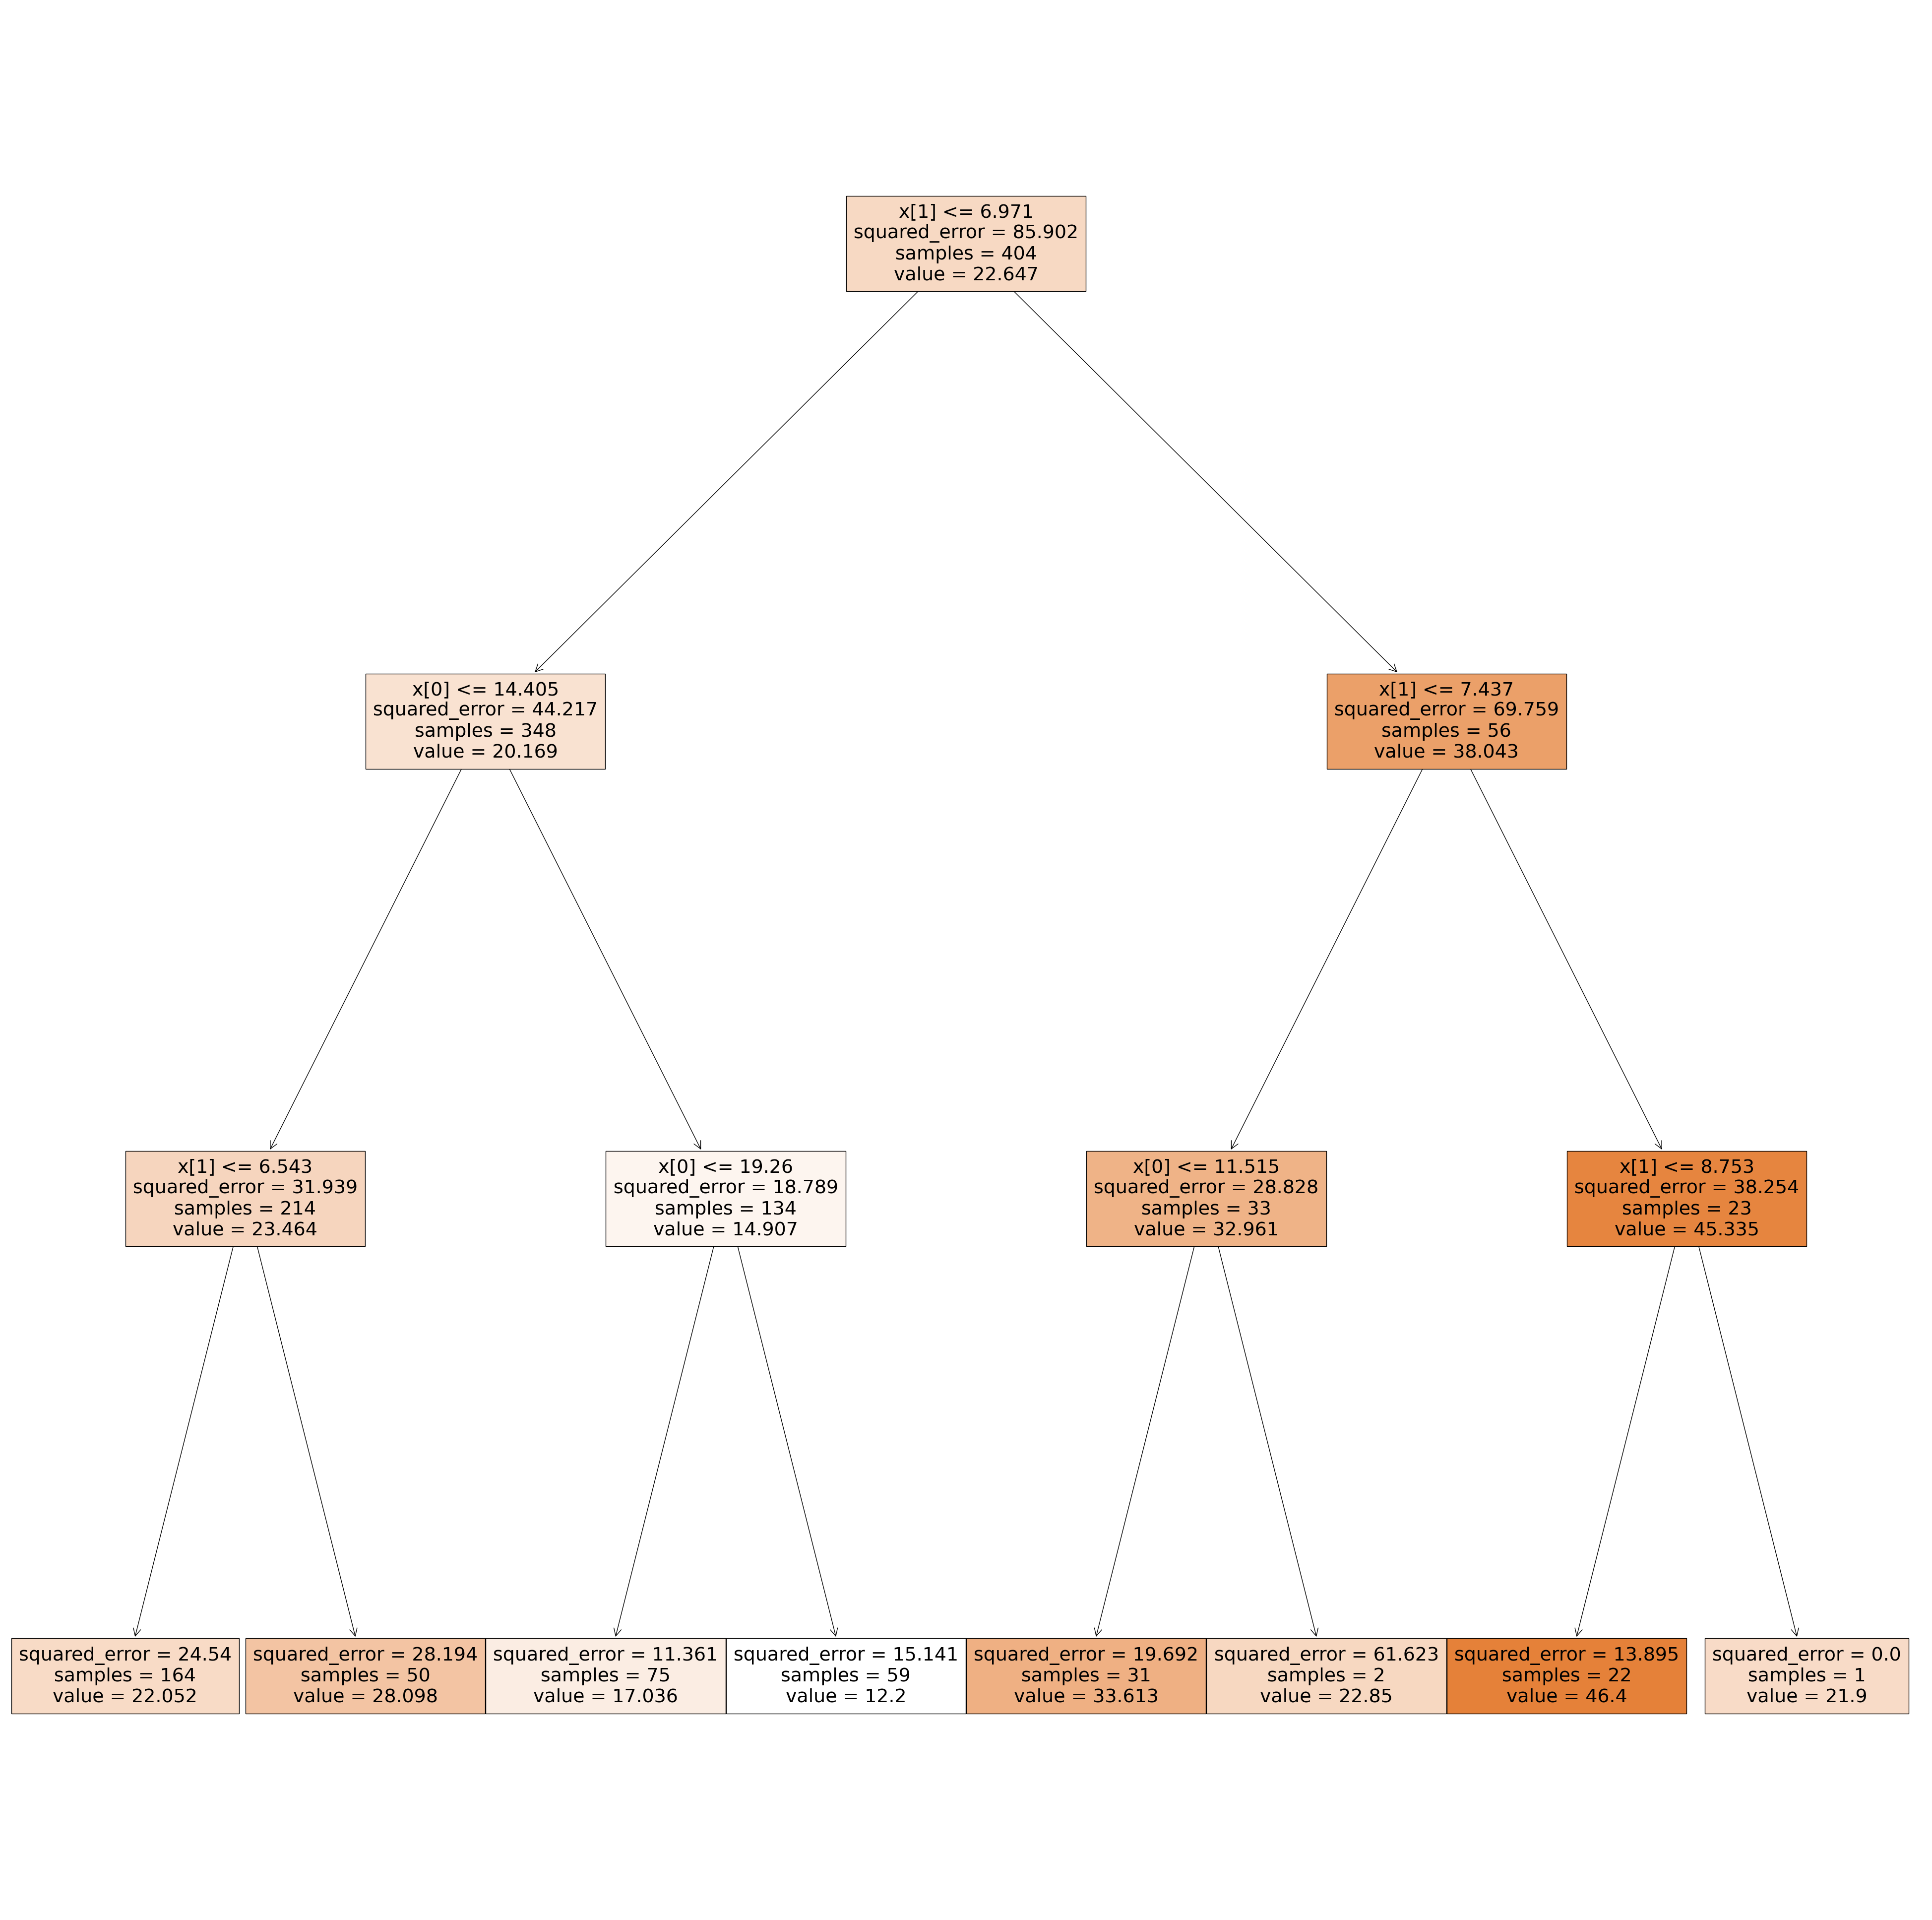

In [20]:
plt.figure(figsize=(50,50))
plot_tree(tree, filled=True)
#plt.savefig(filename)
plt.show()

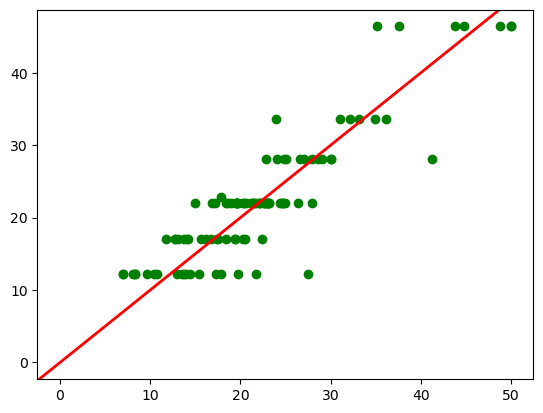

In [21]:
#comparison between the real and predicted values with testing data
plt.scatter(y_test, y_test_predict, color = 'green')
plt.axline((0, 0), (1, 1), linewidth=2, color='r')
plt.show()

### **EXERCISE: obtain a new decision tree using other (or more) variables**

### **EXERCISE: modify the hyperparameters of the decision tree (max_depth, max_leaf_nodes)**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html